In [74]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt
torch.manual_seed(111)

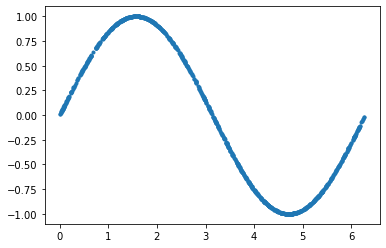

In [75]:
train_lenght = 1024
X = torch.zeros(train_lenght, 2)
X[:, 0] = math.pi * 2 * torch.rand(train_lenght)
X[:, 1] = torch.sin(X[:, 0])
y = torch.zeros(train_lenght)
train_data = list(zip(X, y))
# train_data = [(X[i], y[i]) for i in range(train_lenght)]
plt.plot(X[:, 0], X[:, 1], ".")

In [76]:
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [77]:
class DiscriminatorNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        output = self.model(x)
        return output

disc_net = DiscriminatorNet()

In [78]:
class GeneratorNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

gen_net = GeneratorNet()

In [79]:
# training network

lr = 0.001
epochs = 300
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(disc_net.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(gen_net.parameters(), lr=lr)

for epoch in range(epochs):
    for n, (real_samples, _) in enumerate(train_dataloader):
        # passing random data for gen net
        random_samples = torch.randn((batch_size, 2))
        generated_samples = gen_net(random_samples)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        all_samples = torch.cat((real_samples, generated_samples))
        all_labels = torch.cat((real_labels, fake_labels))

        # training the discriminator
        disc_net.zero_grad()
        output_discriminator = disc_net(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # data for the generator
        random_samples = torch.randn((batch_size, 2))

        # trainning generator
        gen_net.zero_grad()
        output_generator = gen_net(random_samples)
        output_discriminator_generated = disc_net(output_generator)
        loss_generator = loss_function(output_discriminator_generated, real_labels)
        loss_generator.backward()
        optimizer_generator.step()

        if epoch % 10 == 0 and batch_size - 1 == n:
            print(f"Epoch: {epoch}, Loss Discriminator: {loss_discriminator}")
            print(f"Epoch: {epoch}, Loss Generator: {loss_generator}")

Epoch: 0, Loss Discriminator: 0.2226443737745285
Epoch: 0, Loss Generator: 5.4521942138671875
Epoch: 10, Loss Discriminator: 0.4376943111419678
Epoch: 10, Loss Generator: 1.2598892450332642
Epoch: 20, Loss Discriminator: 0.6298313736915588
Epoch: 20, Loss Generator: 1.014276385307312
Epoch: 30, Loss Discriminator: 0.5686609745025635
Epoch: 30, Loss Generator: 1.0218346118927002
Epoch: 40, Loss Discriminator: 0.6202436089515686
Epoch: 40, Loss Generator: 1.2138384580612183
Epoch: 50, Loss Discriminator: 0.6216217875480652
Epoch: 50, Loss Generator: 0.7845667004585266
Epoch: 60, Loss Discriminator: 0.7271636724472046
Epoch: 60, Loss Generator: 0.6444259285926819
Epoch: 70, Loss Discriminator: 0.5534158945083618
Epoch: 70, Loss Generator: 0.8389837741851807
Epoch: 80, Loss Discriminator: 0.6140118837356567
Epoch: 80, Loss Generator: 0.78412926197052
Epoch: 90, Loss Discriminator: 0.6261143684387207
Epoch: 90, Loss Generator: 0.8715825080871582
Epoch: 100, Loss Discriminator: 0.66403478384

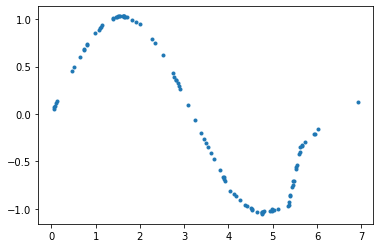

In [82]:
random_sample = torch.randn(100, 2)
generated = gen_net(random_sample)
generated = generated.detach()
plt.plot(generated[:, 0], generated[:, 1], ".")